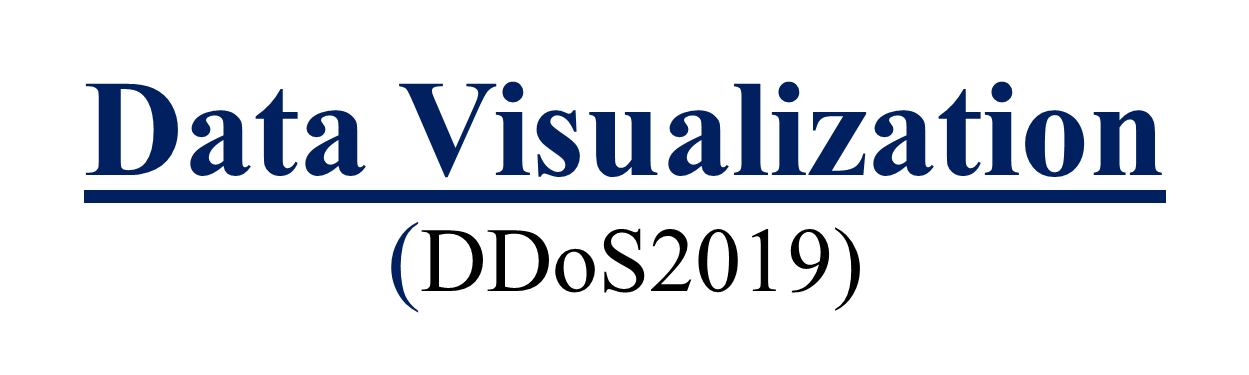

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
LDAP = pd.read_csv('/content/drive/My Drive/DDos_Dataset/LDAP11.csv')
Portmap = pd.read_csv('/content/drive/My Drive/DDos_Dataset/Portmap1.csv')
UDPLag=pd.read_csv('/content/drive/My Drive/DDos_Dataset/UDPLag11.csv')
data = pd.concat([LDAP,Portmap,UDPLag], ignore_index = True)



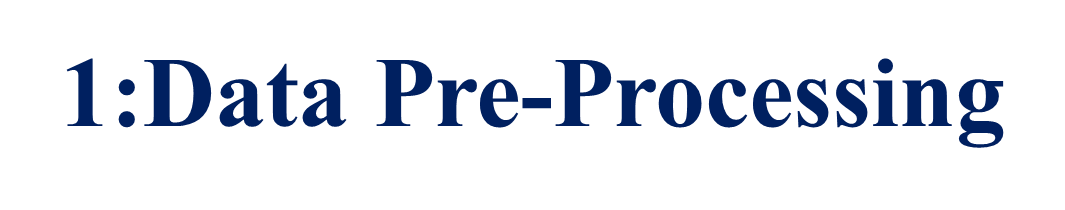

In [ ]:
data.head(5)

,Unnamed: 0,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,SimillarHTTP,Bwd Packets/s,Total Fwd Packets,Total Length of Fwd Packets,Flow Duration,Total Length of Bwd Packets,Total Backward Packets,Protocol,Inbound,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol.1,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets.1,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,73,0,0,6,1.500000,1.00000,3,1,0,240.22293,1,0,20814,62,5,6,0,2018-11-03 10:09:30.213651,57816,0,0,192.168.50.9-23.194.142.213-57816-443-6,8.857142,0,10.333333,0,0.0,0.0,2978.76440,31,6,48.044586,288.267520,0,0,443,0,BENIGN
1,75,0,0,276,138.000000,190.91884,273,3,0,87.89921,1,6,34130,18,3,6,0,2018-11-03 10:09:30.213678,44764,6,6,192.168.50.9-8.43.72.113-44764-443-6,6.000000,6,7.500000,0,6.0,6.0,703.19366,6,6,29.299736,117.198944,6,6,443,0,BENIGN
2,161222,0,0,4,1.333333,0.57735,2,1,0,39215.68800,1,0,102,24,4,6,1,2018-11-03 10:09:30.234465,443,0,0,192.168.50.9-23.194.142.213-57816-443-6,4.000000,0,4.800000,0,0.0,0.0,235294.12000,6,6,9803.922000,49019.610000,0,0,57816,0,BENIGN
3,112233,0,0,3,3.000000,0.00000,3,3,0,31250.00000,1,0,64,0,2,6,1,2018-11-03 10:09:30.238839,443,0,0,192.168.50.9-69.172.216.58-43898-443-6,0.000000,0,0.000000,0,0.0,0.0,0.00000,0,6,15625.000000,46875.000000,0,0,43898,0,BENIGN
4,194026,0,0,2,2.000000,0.00000,2,2,0,21505.37700,1,6,93,12,2,6,1,2018-11-03 10:09:30.247810,443,6,6,192.168.50.9-8.43.72.113-44764-443-6,6.000000,6,8.000000,0,6.0,6.0,193548.39000,6,6,10752.688000,32258.064000,6,6,44764,0,BENIGN


In [ ]:
data.columns 

Index(['Unnamed: 0', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'SimillarHTTP', ' Bwd Packets/s', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Flow Duration',
       ' Total Length of Bwd Packets', ' Total Backward Packets', ' Protocol',
       ' Inbound', ' Timestamp', ' Source Port', ' Min Packet Length',
       ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean',
       ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count',
       ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s',
       ' Max Packet Length', ' Protocol.1', 'Fwd Packets/s', ' Flow Packets/s',
       'Total Length of Fwd Packets.1', ' Subflow Fwd Bytes',
       ' Destination Port', ' act_data_pkt_fwd', ' Label'],
      dtype='object')

In [ ]:
data.shape

(15000, 38)

In [ ]:
data.describe()

,Unnamed: 0,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd Packets/s,Total Fwd Packets,Total Length of Fwd Packets,Flow Duration,Total Length of Bwd Packets,Total Backward Packets,Protocol,Inbound,Source Port,Min Packet Length,Fwd Packet Length Min,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol.1,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets.1,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
count,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.499800e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,128270.938267,5.416747e+06,5.677884e+04,9.356241e+06,7.615474e+05,1.559986e+06,4.550104e+06,1.297267,4.228639e+03,10.219400,880.637867,1.505985e+07,7.634036e+03,8.696933,10.472533,0.428400,41562.597600,133.657133,136.930867,178.912722,246.161267,246.793730,0.284200,157.805400,157.805400,1.241995e+08,366.352067,10.472533,3.284016e+05,3.326302e+05,880.637867,880.637867,18349.015533,6.371267
std,159477.823519,1.303250e+07,1.206210e+06,2.672721e+07,2.356781e+06,4.580719e+06,1.326606e+07,3.711094,5.434819e+04,226.918144,3484.242497,3.176950e+07,4.832606e+05,262.881725,5.487032,0.494863,22791.316492,281.492063,288.008115,293.020201,438.929596,425.556324,0.451048,288.262323,288.262323,3.830021e+08,673.990813,5.487032,5.668697e+05,5.699931e+05,3484.242497,3484.242497,22985.496829,155.304580
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1168.000000,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.000000,24.000000,3.000000e+00,0.000000e+00,0.000000,6.000000,0.000000,30298.750000,6.000000,6.000000,6.000000,6.000000,7.500000,0.000000,6.000000,6.000000,1.104596e+02,6.000000,6.000000,2.841260e+00,6.345636e+00,24.000000,24.000000,80.000000,1.000000
50%,71465.500000,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000,2.375712e-01,2.000000,78.000000,2.079800e+04,1.200000e+01,2.000000,6.000000,0.000000,52854.000000,6.000000,6.000000,46.566666,36.000000,58.000000,0.000000,32.250000,32.250000,1.244525e+04,58.500000,6.000000,9.632519e+01,1.926272e+02,78.000000,78.000000,443.000000,1.000000
75%,177065.000000,2.058458e+05,3.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,2.000000,9.421963e+01,6.000000,760.000000,2.156942e+06,1.220000e+02,2.000000,17.000000,1.000000,59498.750000,45.000000,46.000000,354.787835,379.000000,401.725000,1.000000,169.666670,169.666670,3.700000e+07,380.000000,17.000000,6.666667e+05,6.666667e+05,760.000000,760.000000,39872.250000,3.000000
max,610831.000000,1.097105e+08,4.915212e+07,1.199473e+08,3.440100e+07,5.958428e+07,1.032030e+08,96.000000,2.000000e+06,20444.000000,188320.000000,1.199975e+08,5.842950e+07,31700.000000,17.000000,1.000000,65533.000000,1472.000000,2131.000000,1472.000000,3617.000000,2208.000000,1.000000,2131.000000,2131.000000,2.944000e+09,3617.000000,17.000000,3.000000e+06,3.000000e+06,188320.000000,188320.000000,65519.000000,18766.000000


In [ ]:
# Drop Unnamed:0
data = data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
#Detecter les valeurs nulles
data_real = data.replace(np.inf, np.nan)
data_real.isnull().sum().sum()
data_ = data_real.dropna(axis=0)
data_.isnull().sum().sum()

0

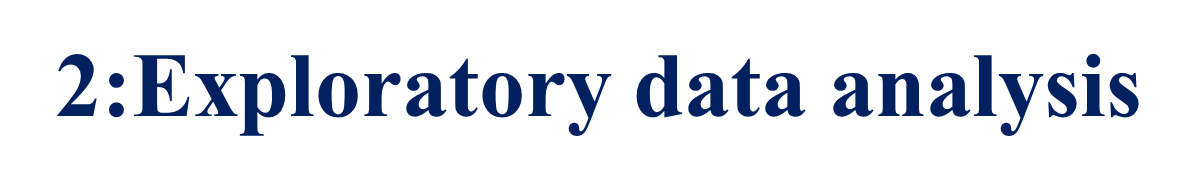

In [ ]:
data[' Label'].value_counts()

BENIGN     9196
UDPLag     1873
Syn        1771
Portmap    1293
LDAP        406
UDP         333
NetBIOS     128
Name:  Label, dtype: int64

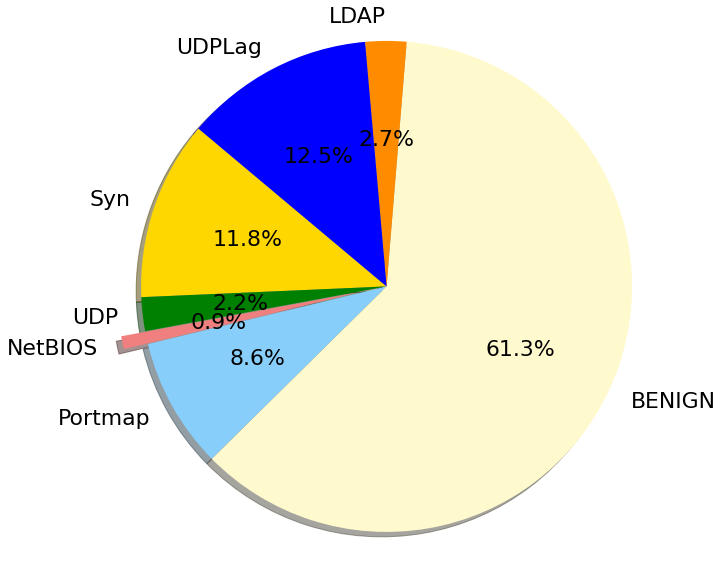

In [ ]:
labels = 'Syn', 'UDP', 'NetBIOS','Portmap','BENIGN','LDAP','UDPLag'
sizes = [ len(data_[data_[' Label']=='Syn']), 
         len(data_[data_[' Label']=='UDP']), len(data_[data_[' Label']=='NetBIOS']),
         len(data_[data_[' Label']=='Portmap']),
         len(data_[data_[' Label']=='BENIGN']),len(data_[data_[' Label']=='LDAP']),len(data_[data_[' Label']=='UDPLag'])]
colors = ['gold', 'green', 'lightcoral', 'lightskyblue','lemonchiffon','darkorange','blue']
explode = ( 0, 0, 0.1,0,0,0,0)  # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Text(0, 0.5, ' Flow Packets/s')

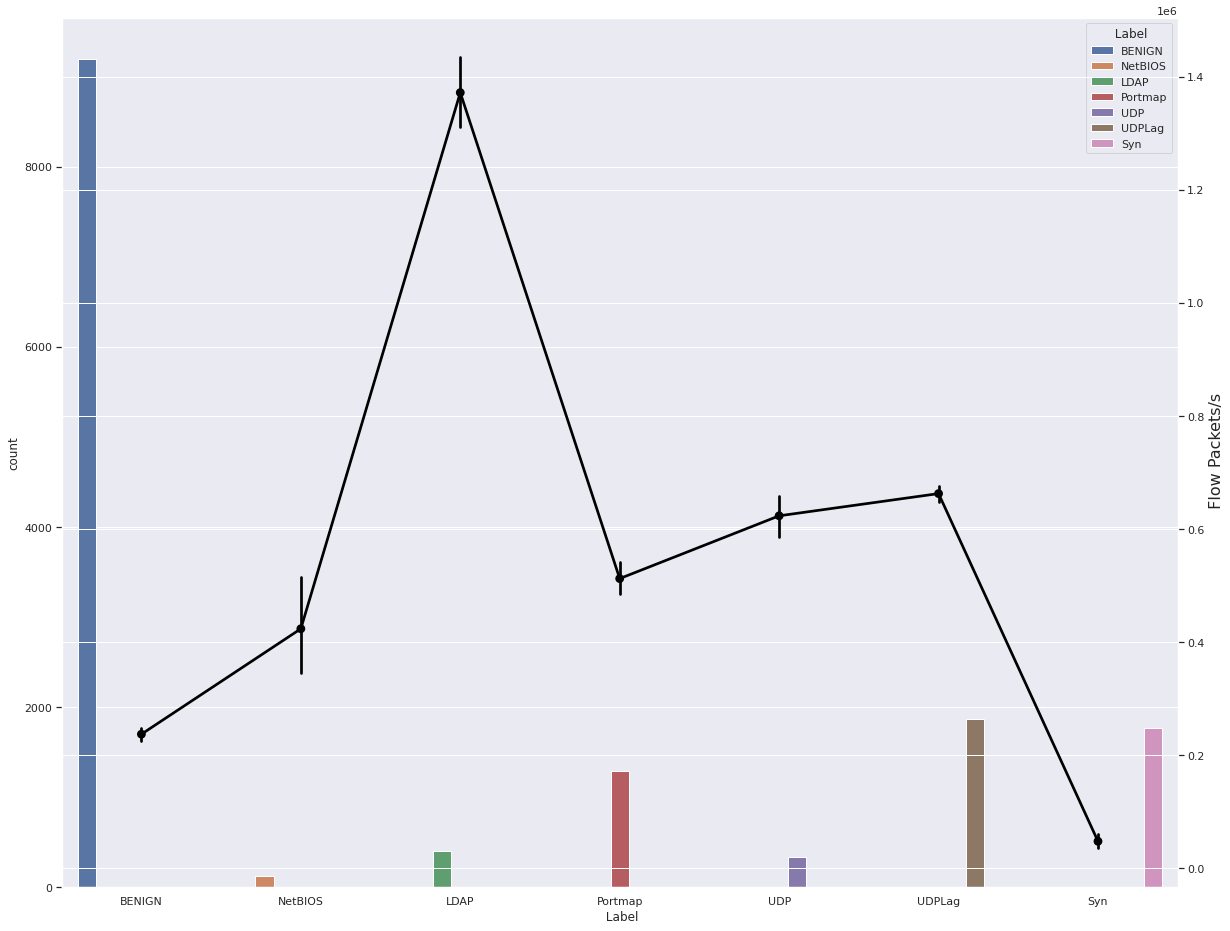

In [ ]:
plt.figure(figsize=(20,16))
sns.set(style="darkgrid")
g1 = sns.countplot(x=' Label', hue=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y=' Flow Packets/s', x=' Label', data=data_, color='black', legend=False)
gt.set_ylabel(" Flow Packets/s", fontsize=16)

In [ ]:
df = data_[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]

df = pd.DataFrame(data,columns=[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd'])
corrMatrix = df.corr()
print (corrMatrix)

                               Bwd Packets/s  ...   act_data_pkt_fwd
 Bwd Packets/s                      1.000000  ...          -0.002091
 Total Fwd Packets                 -0.002335  ...           0.744071
Total Length of Fwd Packets        -0.018677  ...           0.321031
 Flow Duration                     -0.036880  ...           0.045757
 Total Length of Bwd Packets       -0.000194  ...           0.996512
 Total Backward Packets            -0.000914  ...           0.997555
 Protocol                          -0.062849  ...          -0.025610
 Inbound                            0.079972  ...          -0.015374
 Min Packet Length                 -0.035865  ...          -0.015865
 Fwd Packet Length Min             -0.031282  ...          -0.015959
 Packet Length Mean                -0.043899  ...           0.037839
 Fwd Packet Length Max             -0.039264  ...           0.039193
 Average Packet Size               -0.041933  ...           0.020740
 ACK Flag Count                   

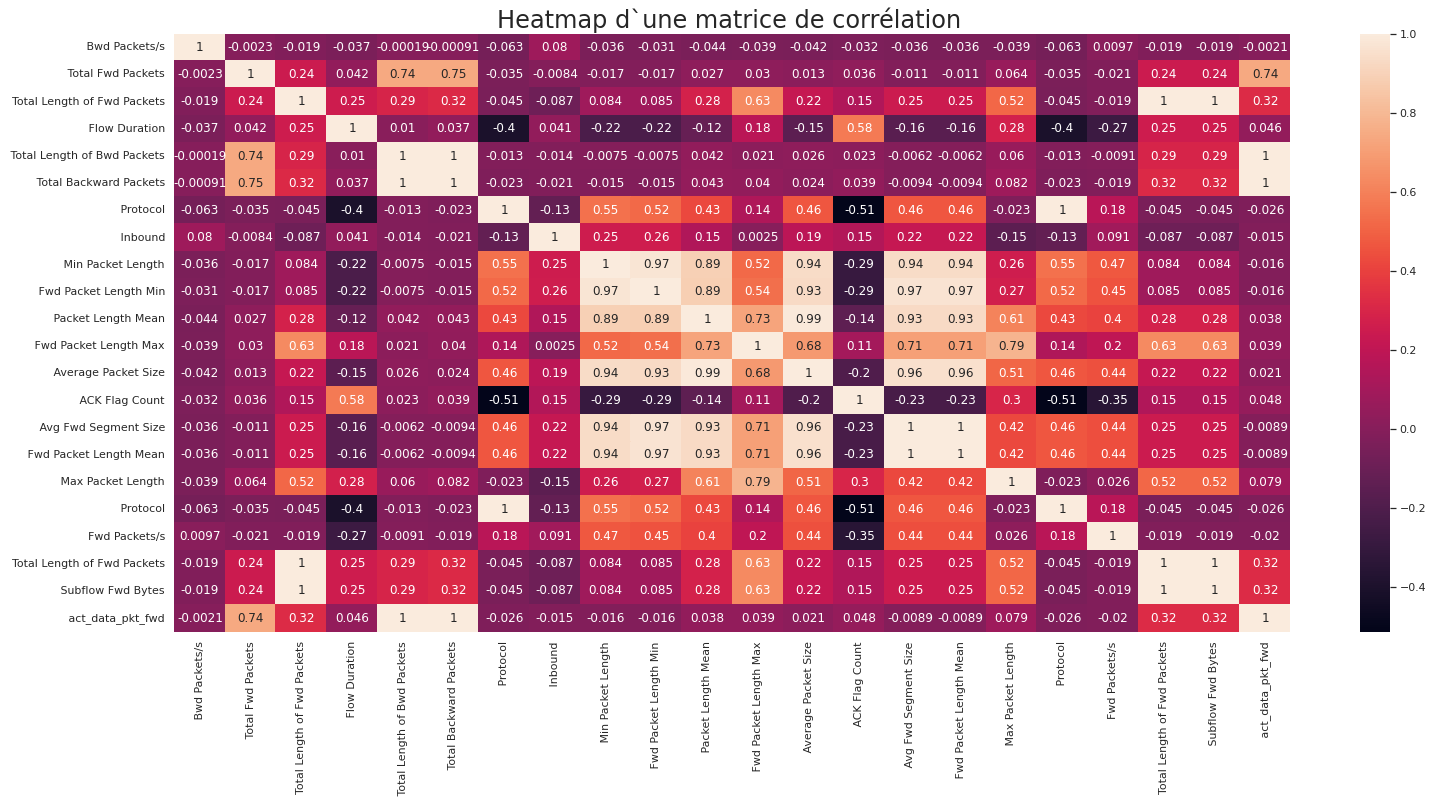

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize =(25,11)) 
plt.title('Heatmap d`une matrice de corrélation ', fontsize=24);


corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()

Text(0, 0.5, 'Flow Bytes/s')

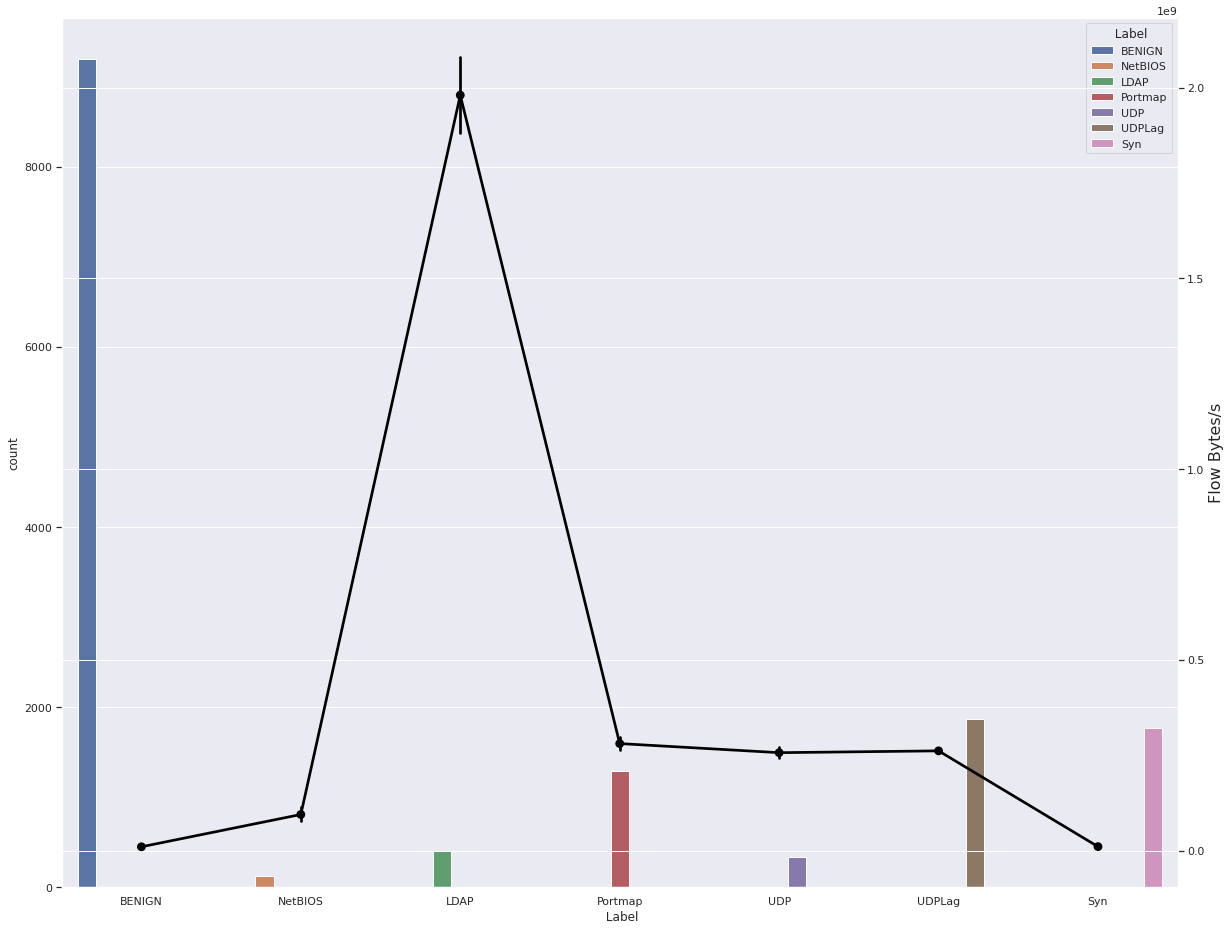

In [ ]:
plt.figure(figsize=(20,16))
sns.set(style="darkgrid")
g1 = sns.countplot(x=' Label', hue=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y='Flow Bytes/s', x=' Label', data=data_, color='black', legend=False)
gt.set_ylabel("Flow Bytes/s", fontsize=16)

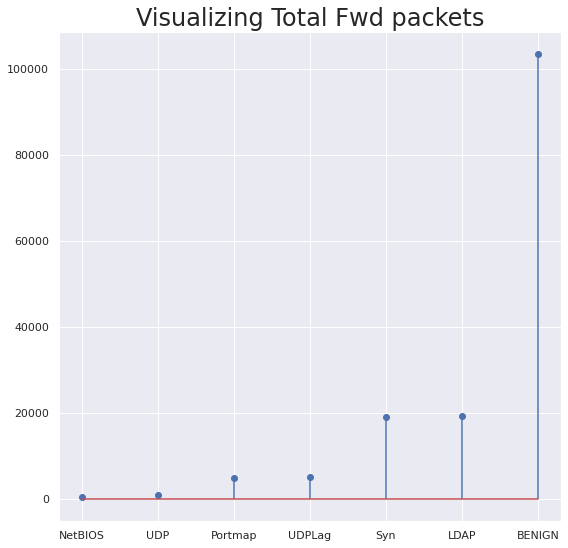

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="darkgrid")
plt.figure(figsize=(9,9))
result = data_.groupby([" Label"])[' Total Fwd Packets'].sum().reset_index().sort_values(' Total Fwd Packets')
plt.stem(result[' Label'],result[' Total Fwd Packets'], use_line_collection = True)

plt.title('Visualizing Total Fwd packets', fontsize=24);
plt.show()

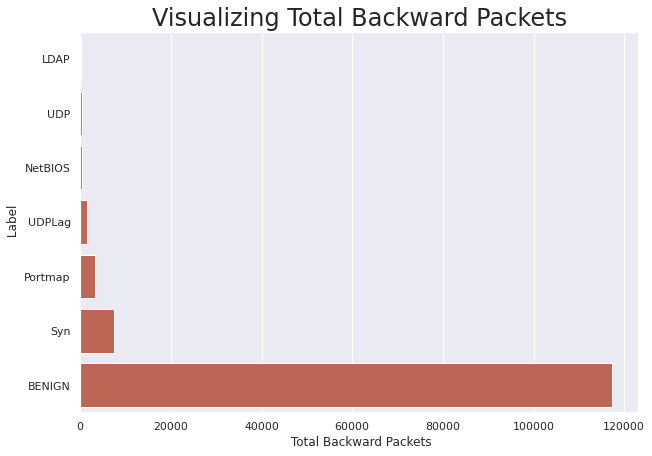

In [ ]:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
df1=data_[[' Label',' Total Backward Packets']]
result1 = df1.groupby([" Label"])[' Total Backward Packets'].sum().reset_index().sort_values(' Total Backward Packets')
plt.title('Visualizing Total Backward Packets', fontsize=24);

sns.barplot(
    x=" Total Backward Packets", 
    y=" Label",  
    data=result1,
    estimator=sum, 
    ci=None, 
    color='#CD5B45');

Text(0, 0.5, ' Protocol')

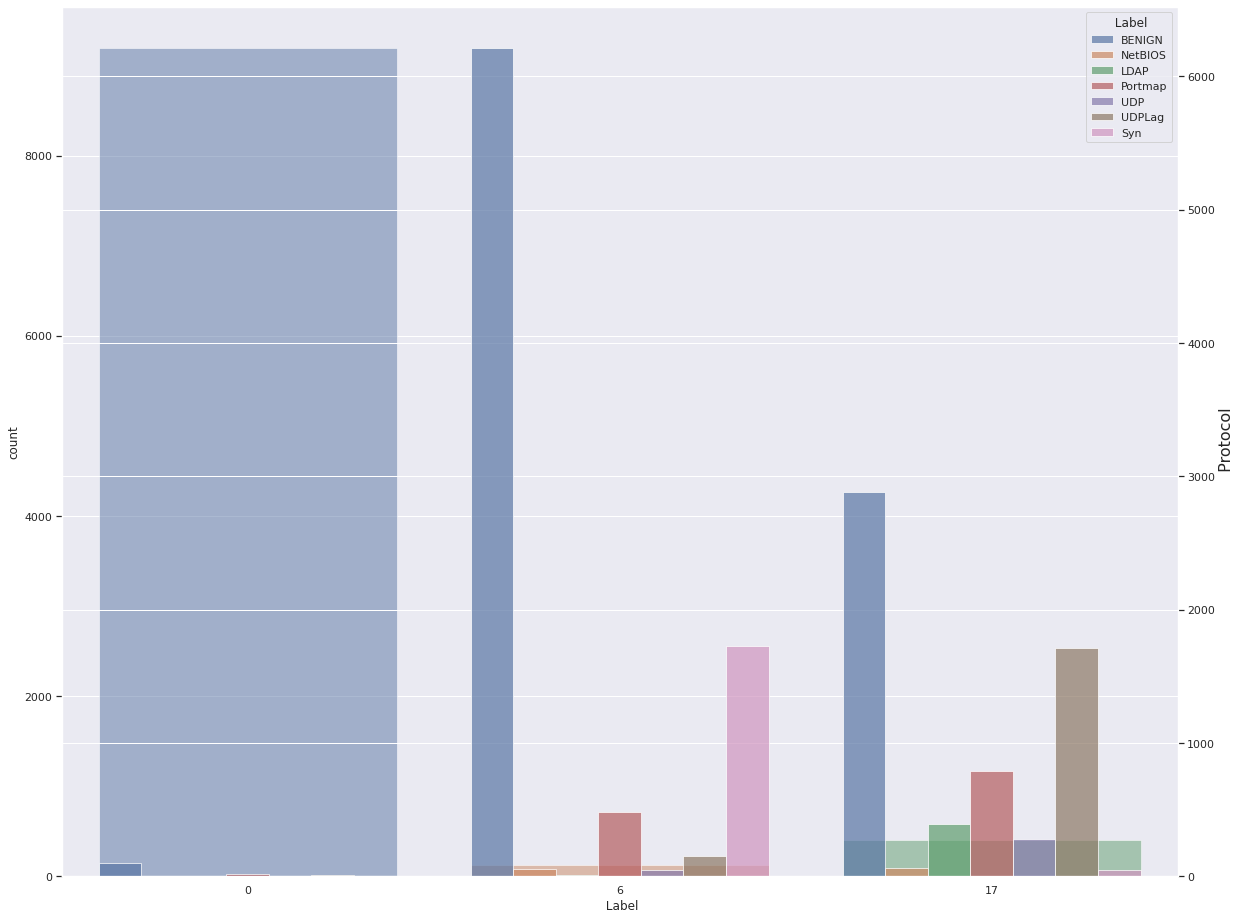

In [ ]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Protocol', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(" Protocol", fontsize=16)

Text(0, 0.5, ' Inbound')

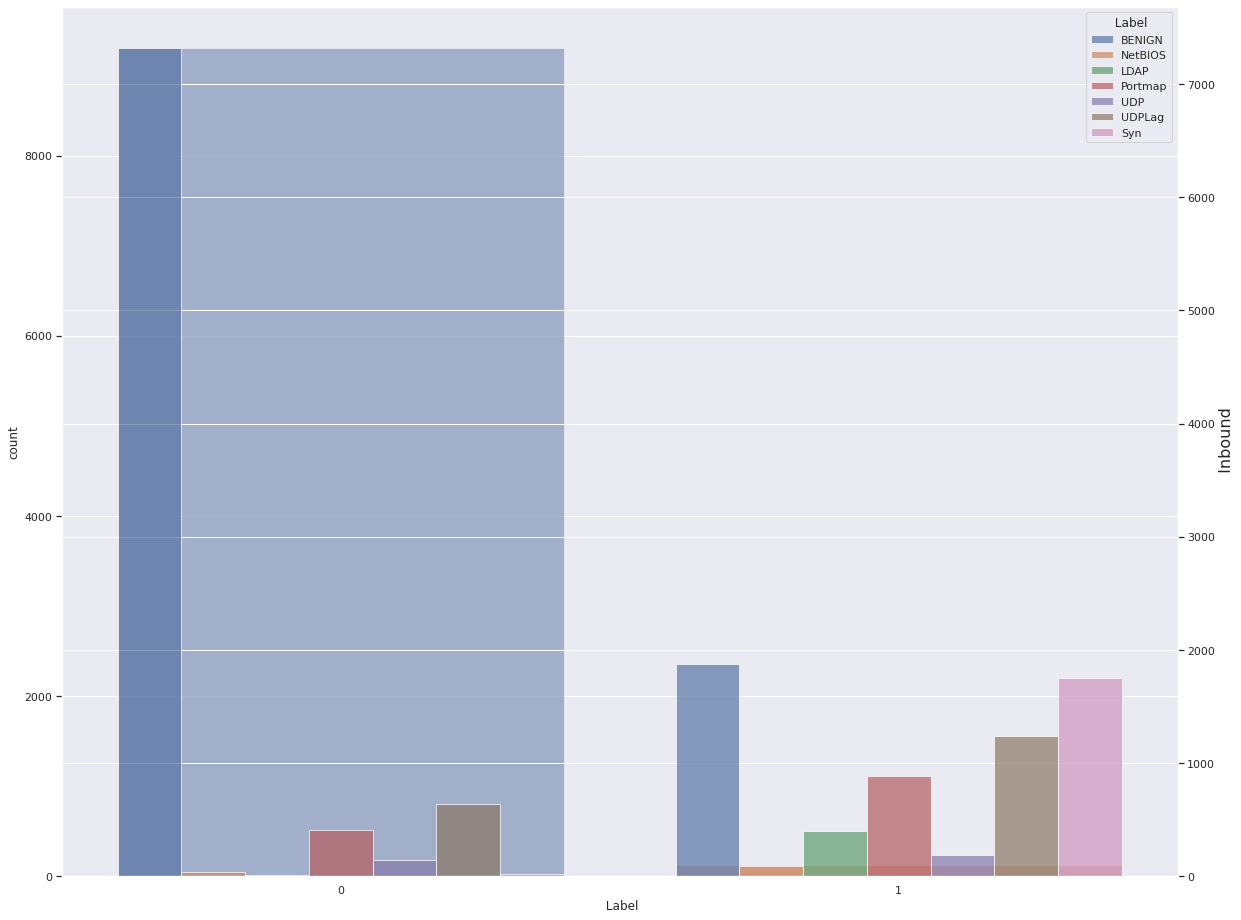

In [ ]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Inbound', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(' Inbound', fontsize=16)

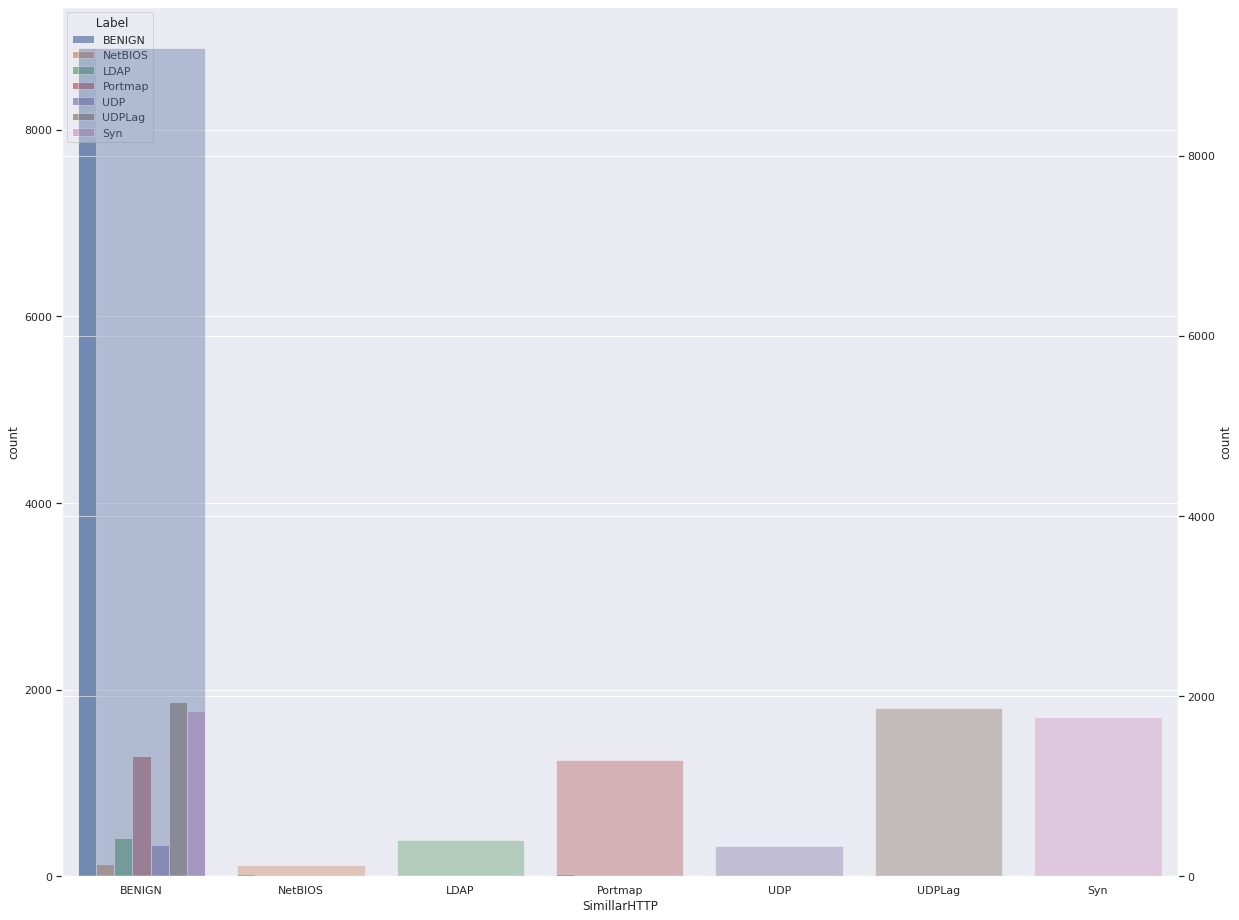

In [ ]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x='SimillarHTTP', hue=' Label',alpha=0.7, data=data_)
gt = g1.twinx()
gt = sns.countplot(x=' Label', data=data_,alpha=0.4)

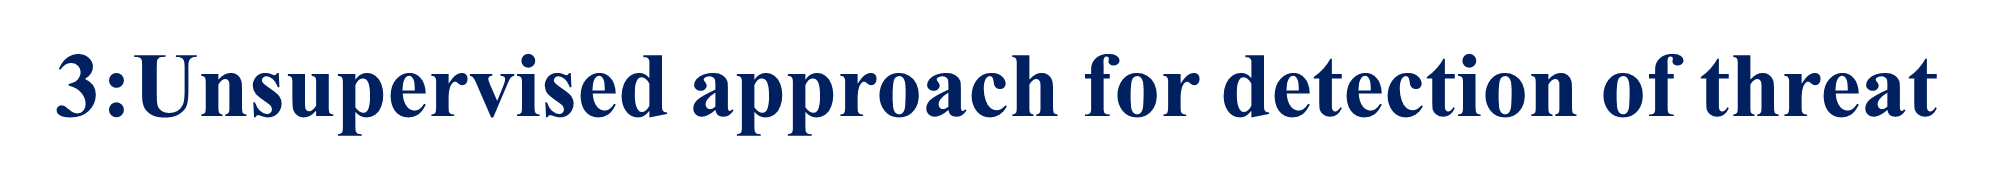

In [ ]:

df2 = data_[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]
df2.dtypes

 Bwd Packets/s                  float64
 Total Fwd Packets                int64
Total Length of Fwd Packets       int64
 Flow Duration                    int64
 Total Length of Bwd Packets      int64
 Total Backward Packets           int64
 Protocol                         int64
 Inbound                          int64
 Min Packet Length                int64
 Fwd Packet Length Min            int64
 Packet Length Mean             float64
 Fwd Packet Length Max            int64
 Average Packet Size            float64
 ACK Flag Count                   int64
 Avg Fwd Segment Size           float64
 Fwd Packet Length Mean         float64
 Max Packet Length                int64
 Protocol                         int64
Fwd Packets/s                   float64
Total Length of Fwd Packets       int64
 Subflow Fwd Bytes                int64
 act_data_pkt_fwd                 int64
dtype: object

In [ ]:
scale = preprocessing.StandardScaler()
X = scale.fit_transform(df2)
X_norm = preprocessing.normalize(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


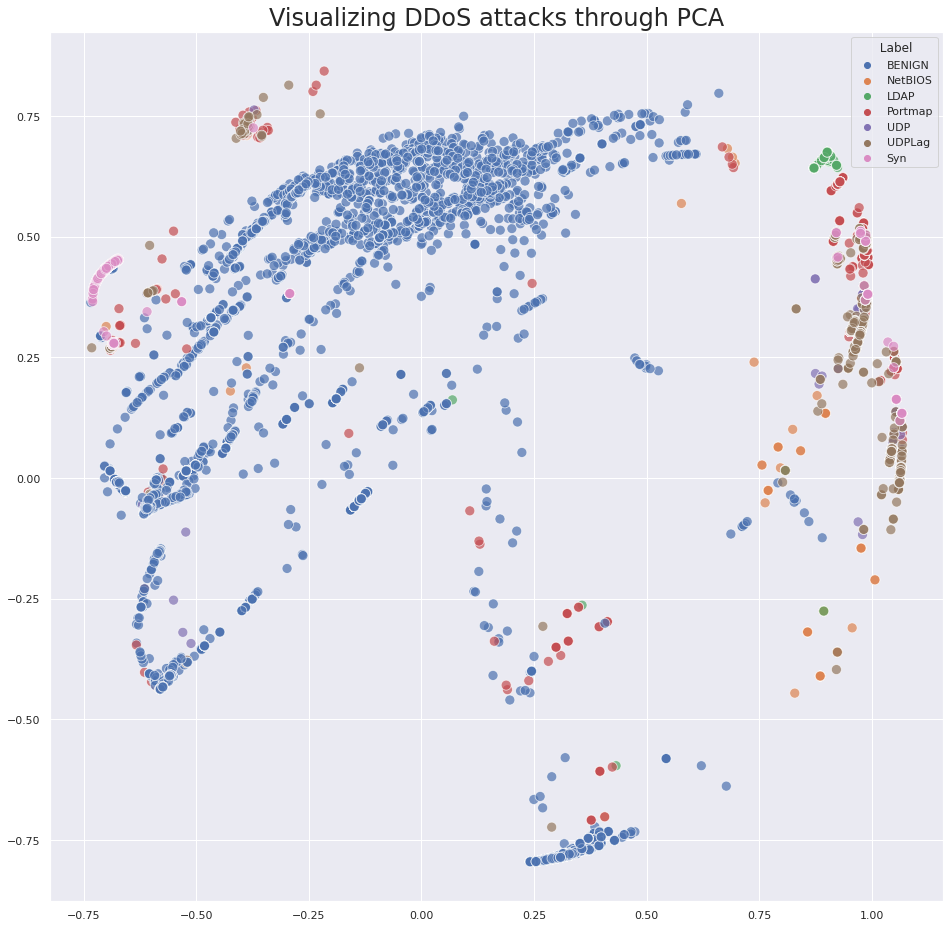

In [ ]:
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X_norm)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(principalComponents[:, 0], principalComponents[:, 1], s= 100, hue=data_[' Label'], cmap='Spectral',alpha=0.7)
plt.title('Visualizing DDoS attacks through PCA', fontsize=24);

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


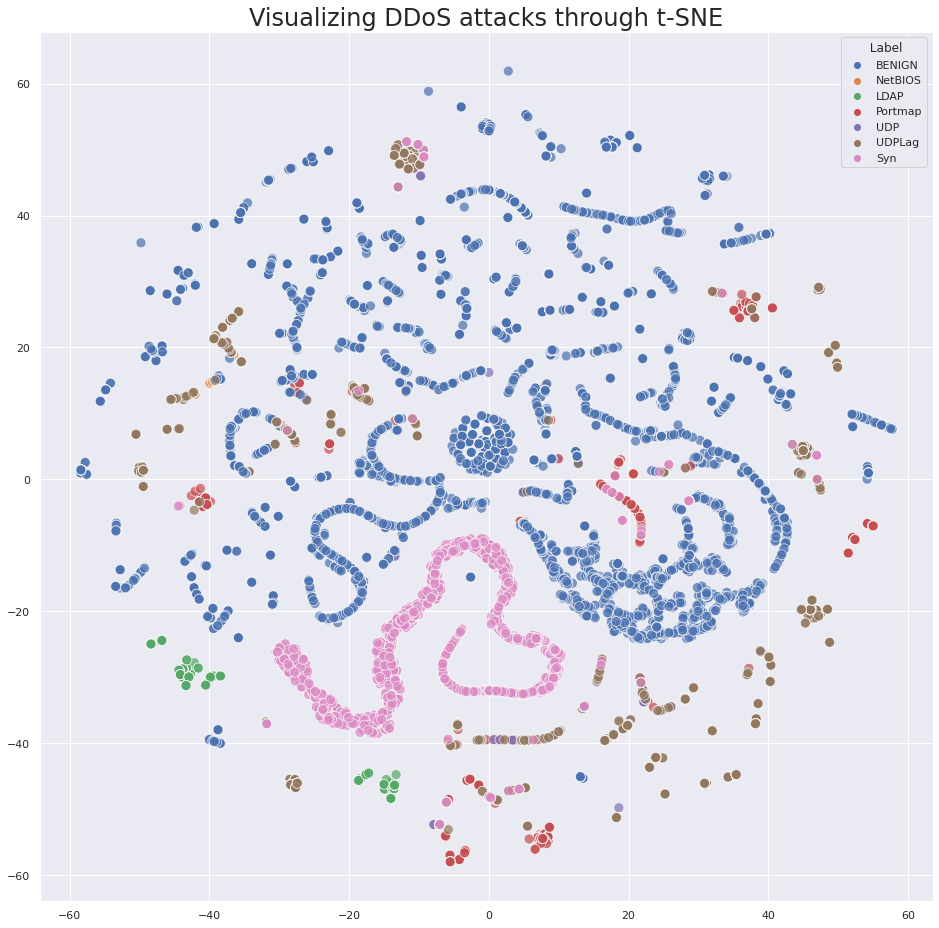

In [ ]:
pca_ = PCA(n_components=2) 
principalComponents = pca_.fit_transform(X_norm)
tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(tsne_[:, 0], tsne_[:, 1], s= 100, hue=data_[' Label'], cmap='Spectral',alpha=0.7)
plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24);

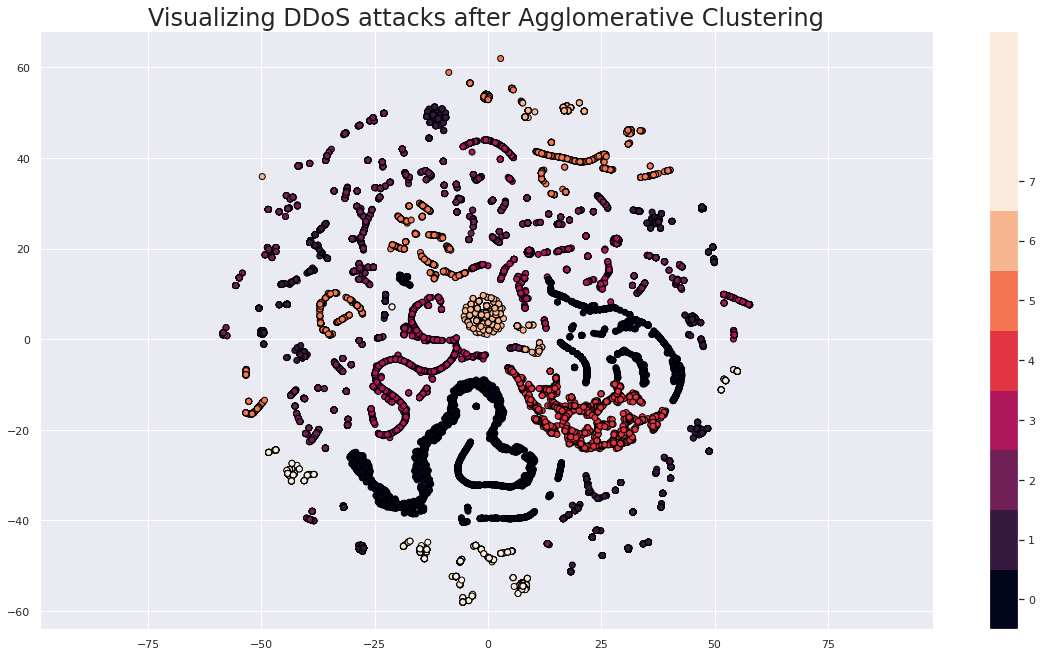

In [ ]:
Agglo = AgglomerativeClustering(n_clusters=8)
Agglo.fit(principalComponents)
plt.figure(figsize=(20,11))
plt.scatter(tsne_[:, 0],tsne_[:, 1], c=Agglo.labels_,edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(8))
plt.title('Visualizing DDoS attacks after Agglomerative Clustering', fontsize=24);
plt.show()


 
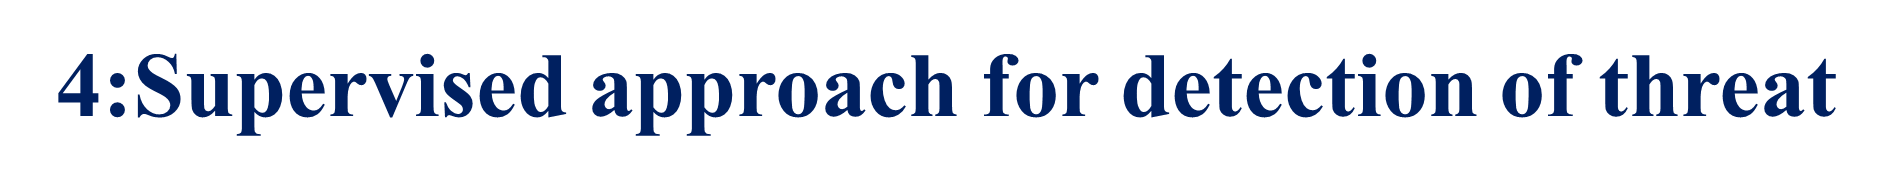

In [ ]:
data_X = data_.drop([' Label','SimillarHTTP'], axis = 1)

In [ ]:
data_X.shape 

(14998, 35)

In [ ]:
data_y = data_[' Label']

In [ ]:
data_y.shape 

(14998,)

In [ ]:
#Encoding Label
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)

In [ ]:
data_y_trans

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
#data_X

In [ ]:
le_fid = LabelEncoder()
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [ ]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])



### Feature Selection 

In [ ]:
 
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([0.01615847, 0.00288346, 0.00754073, 0.00480364, 0.00439745,
       0.00589336, 0.00184655, 0.00684927, 0.00789361, 0.01118142,
       0.04088121, 0.00178303, 0.00239465, 0.02717739, 0.08269893,
       0.1127396 , 0.03330022, 0.06753121, 0.05341615, 0.11693218,
       0.02388207, 0.02439073, 0.03553393, 0.06223284, 0.03734076,
       0.03822838, 0.02284289, 0.02257587, 0.02266914, 0.01742647,
       0.01317068, 0.0145451 , 0.00920886, 0.0369491 , 0.01070065])

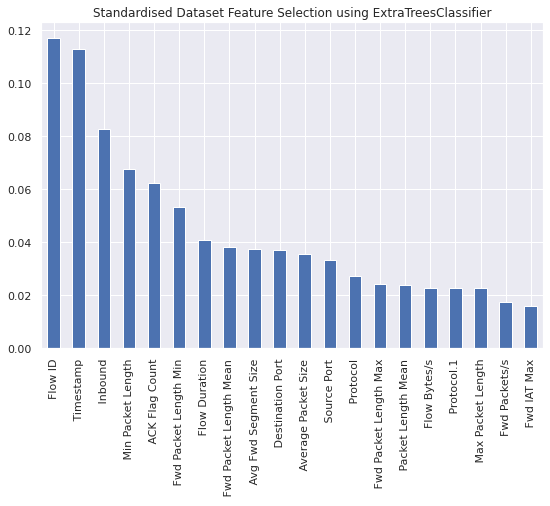

In [ ]:
plt.figure(figsize=(9,6))
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [ ]:
data_new_20features_X = data_X[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]

### Train Test Split Normal dataset ( All features)





In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [ ]:
X_train.shape 

(10498, 35)

In [ ]:
X_test.shape 

(4500, 35)

In [ ]:
X_train.describe

<bound method NDFrame.describe of         Fwd IAT Max   Fwd IAT Min  ...   Destination Port   act_data_pkt_fwd
5898              1             1  ...                 53                  1
13111             3             3  ...              23940                  1
1574       10244029             2  ...                443                  0
12995             3             3  ...              49630                  1
881         5157165             2  ...                443                  5
...             ...           ...  ...                ...                ...
5193            120             3  ...                 80                  0
13420      21153707             1  ...              47423                 13
5392              2             2  ...              43582                  1
862        10046417             2  ...                 80                 29
7272              0             0  ...              55110                  0

[10498 rows x 35 columns]>

Standarization

In [ ]:

from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

### Train Test Split 20 Feature Dataset 

In [ ]:
### Train Test Split 20 Feature Dataset 

from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)


**feature Scaling : Standardization of the 20 Feature Dataset **

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

### 1. Decision Tree  Classification 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)


DecisionTreeClassifier()

In [ ]:
dt_y_pred = dt.predict(X_test_std_20)

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

      BENIGN       0.93      0.89      0.91      2763
        LDAP       1.00      0.95      0.97       115
     NetBIOS       0.88      0.52      0.66        44
     Portmap       0.83      0.60      0.70       369
         Syn       0.97      0.94      0.96       516
         UDP       0.12      0.37      0.18       110
      UDPLag       0.59      0.60      0.59       583

    accuracy                           0.82      4500
   macro avg       0.76      0.70      0.71      4500
weighted avg       0.86      0.82      0.84      4500



In [ ]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)

Decision Tree Confusion: 
 [[2472    0    2   14    4  101  170]
 [   2  109    0    4    0    0    0]
 [  15    0   23    1    0    3    2]
 [ 124    0    0  223    7    6    9]
 [  18    0    0    2  486    0   10]
 [  13    0    0    3    0   41   53]
 [  24    0    1   22    2  184  350]]


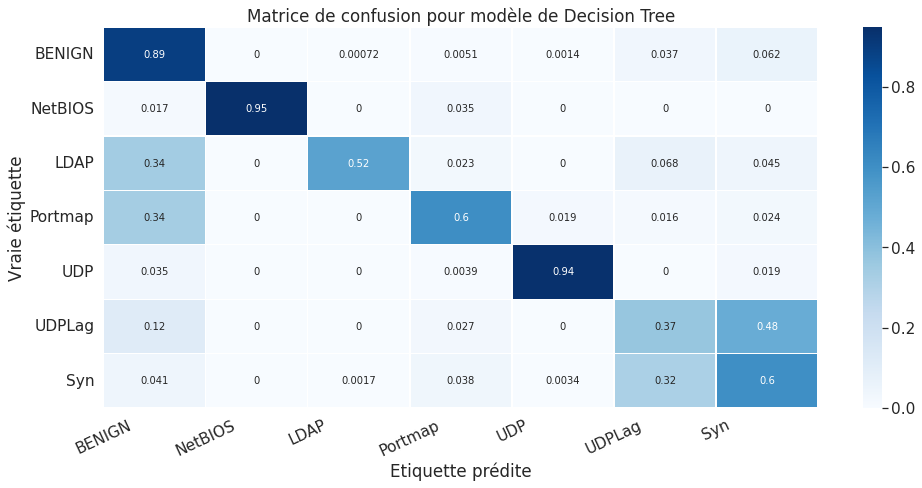

In [ ]:
# Obtenir et remodeler la matrice de confusion data 

matrix = dt_conf_mat.astype('float') / dt_conf_mat.sum(axis=1)[:, np.newaxis] 

# Construire le tracé 
plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Blues, linewidths=0.2) 

# Ajouter des étiquettes à l'intrigue 
class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 
plt.xlabel('Etiquette prédite') 
plt.ylabel('Vraie étiquette') 
plt.title('Matrice de confusion pour modèle de Decision Tree') 
plt.show()

In [ ]:
#RoC curve Function 

def RoC_Curve(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 7
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


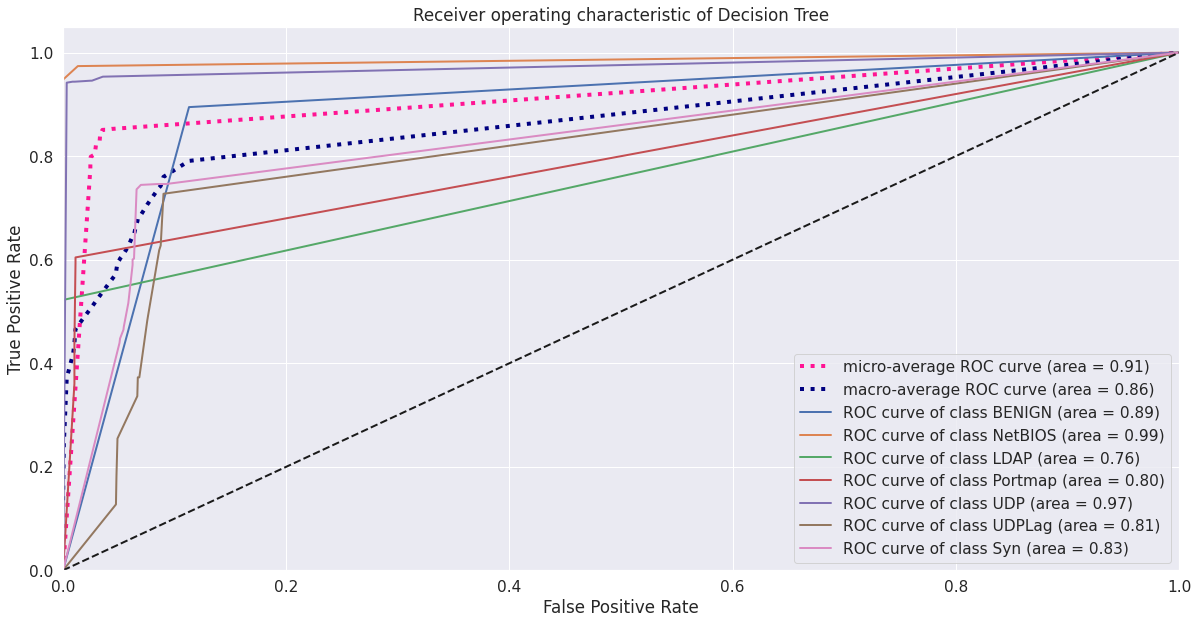

In [ ]:
# RoC Curve 
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
title = 'Receiver operating characteristic of Decision Tree'
RoC_Curve(dt, X_test_std_20, y_test_20, title)

In [ ]:
acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

Accuracy Score for Decision Tree: 
 82.31111111111112


### 2. Naive Bayes Classification 

In [ ]:
from sklearn.naive_bayes import GaussianNB 

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [ ]:
print("Classification Report for Naive Bayes: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(gnb_y_pred)))

Classification Report for Naive Bayes: 
               precision    recall  f1-score   support

      BENIGN       0.78      0.98      0.87      2763
        LDAP       0.00      0.00      0.00       115
     NetBIOS       0.00      0.00      0.00        44
     Portmap       0.18      0.09      0.12       369
         Syn       1.00      0.02      0.04       516
         UDP       0.00      0.00      0.00       110
      UDPLag       0.00      0.00      0.00       583

    accuracy                           0.61      4500
   macro avg       0.28      0.16      0.15      4500
weighted avg       0.61      0.61      0.55      4500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gnb_conf_mat = confusion_matrix(y_test_20, gnb_y_pred)
print("Naive Bayes Confusion Matrix: \n", gnb_conf_mat)

Naive Bayes Confusion Matrix: 
 [[2709    0   43   11    0    0    0]
 [   2    0    4  109    0    0    0]
 [  44    0    0    0    0    0    0]
 [ 153    0  184   32    0    0    0]
 [ 494    0    9    3   10    0    0]
 [  21    0   88    0    0    0    1]
 [  46    0  519   18    0    0    0]]


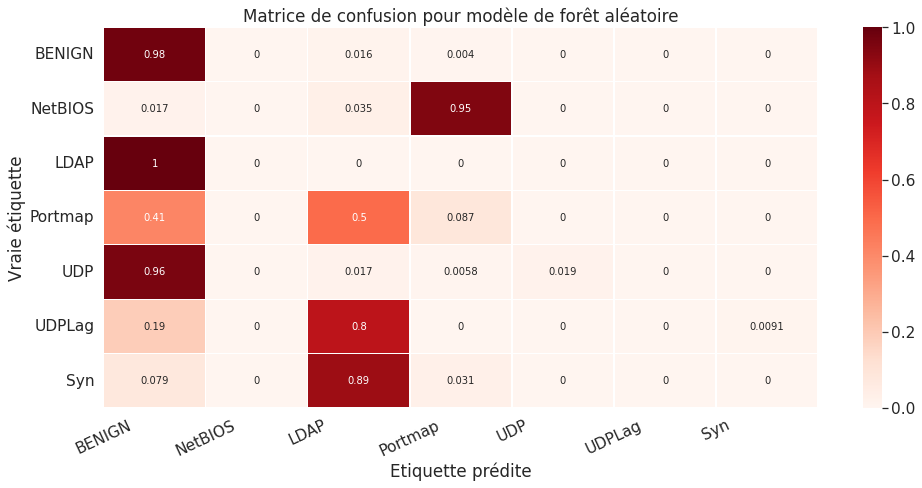

In [ ]:
# Obtenir et remodeler la matrice de confusion data 

matrix = gnb_conf_mat.astype('float') / gnb_conf_mat.sum(axis=1)[:, np.newaxis] 

# Construire le tracé 
plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Reds, linewidths=0.2) 

# Ajouter des étiquettes à l'intrigue 
class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 
plt.xlabel('Etiquette prédite') 
plt.ylabel('Vraie étiquette') 
plt.title('Matrice de confusion pour modèle de forêt aléatoire') 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


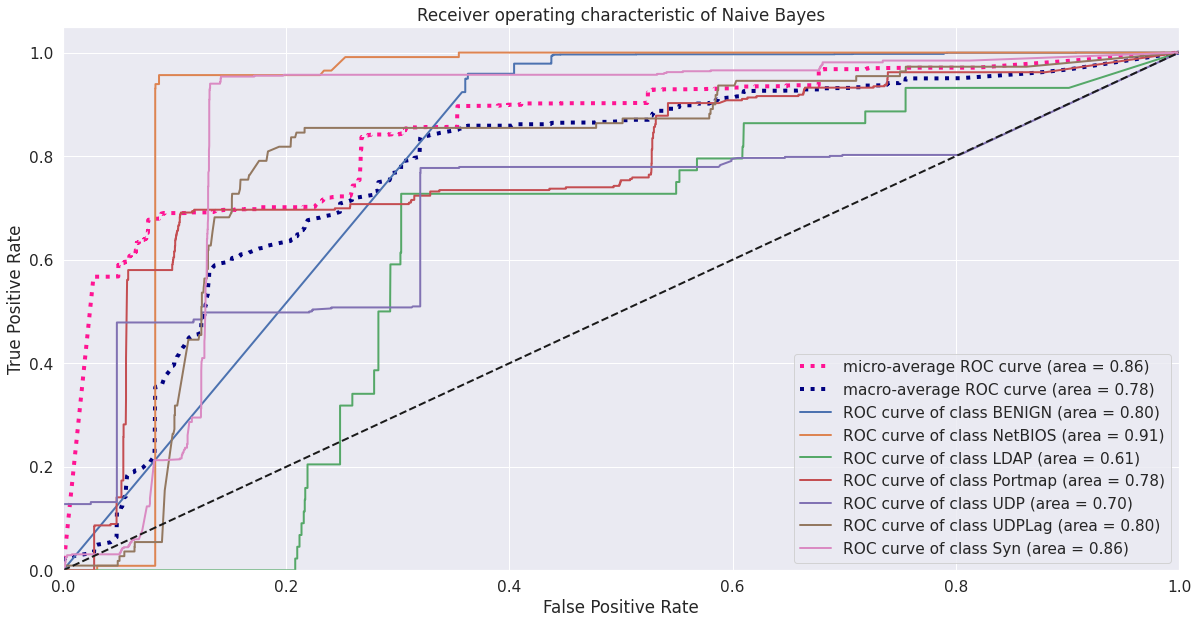

In [ ]:
# RoC Curve 
title = 'Receiver operating characteristic of Naive Bayes'
RoC_Curve(gnb, X_test_std_20, y_test_20, title)

In [ ]:
acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

Accuracy Score for Naive: 
 61.133333333333326


### 3. Random Forest Classification 

In [ ]:
### 1. Random Forest Classification 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)
rf_y_pred = rf.predict(X_test_std_20)

In [ ]:
rf_y_pred

array([4, 3, 0, ..., 0, 0, 0])

In [ ]:
#Rapport ( Random forest)

print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

      BENIGN       0.94      1.00      0.97      2763
        LDAP       1.00      0.95      0.97       115
     NetBIOS       0.92      0.52      0.67        44
     Portmap       0.89      0.76      0.82       369
         Syn       0.99      0.91      0.95       516
         UDP       0.36      0.31      0.33       110
      UDPLag       0.87      0.82      0.84       583

    accuracy                           0.92      4500
   macro avg       0.85      0.75      0.79      4500
weighted avg       0.92      0.92      0.92      4500



In [ ]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[2763    0    0    0    0    0    0]
 [   2  109    0    4    0    0    0]
 [  15    0   23    6    0    0    0]
 [  85    0    1  279    1    1    2]
 [  29    0    0    6  469    0   12]
 [  14    0    0    6    0   34   56]
 [  30    0    1   11    4   60  477]]


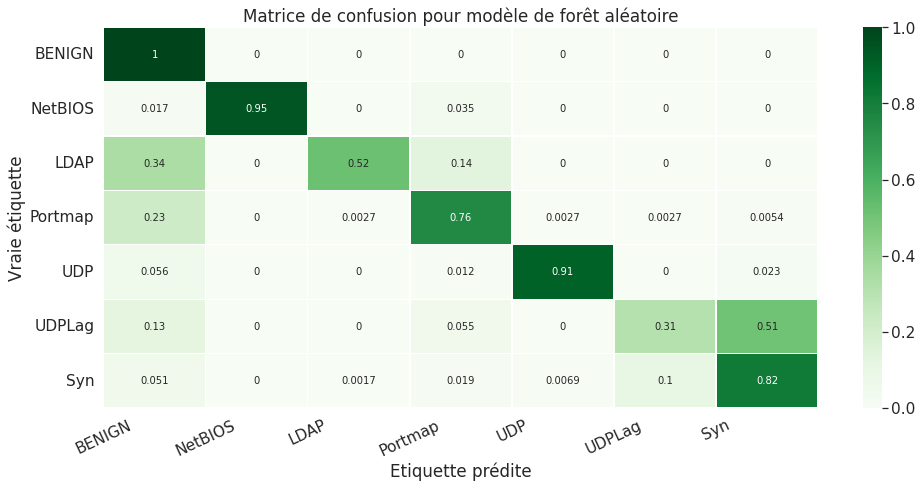

In [ ]:
# Obtenir et remodeler la matrice de confusion data 

matrix = rf_conf_mat.astype('float') / rf_conf_mat.sum(axis=1)[:, np.newaxis] 

# Construire le tracé 
plt.figure(figsize =(16,7)) 
sns.set(font_scale=1.4) 
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, 
            cmap=plt.cm.Greens, linewidths=0.2) 

# Ajouter des étiquettes à l'intrigue 
class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn'] 
tick_marks = np.arange(len( class_names)) 
tick_marks2 = tick_marks + 0.5 
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0) 
plt.xlabel('Etiquette prédite') 
plt.ylabel('Vraie étiquette') 
plt.title('Matrice de confusion pour modèle de forêt aléatoire') 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


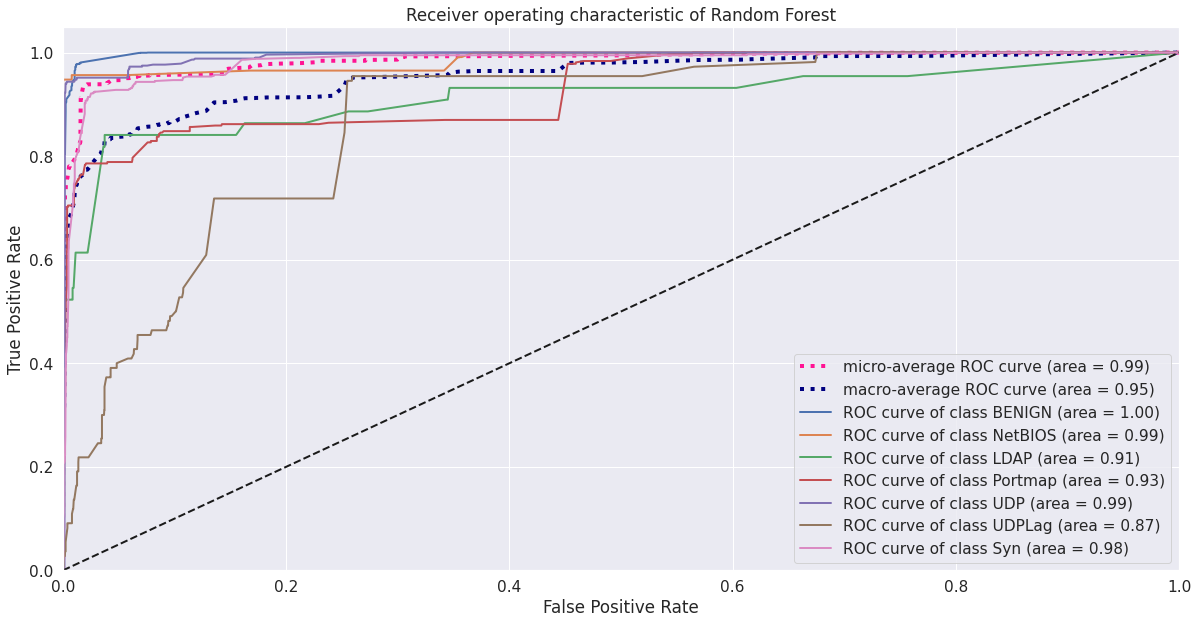

In [ ]:

title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

In [ ]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 92.31111111111112


ALL PRE


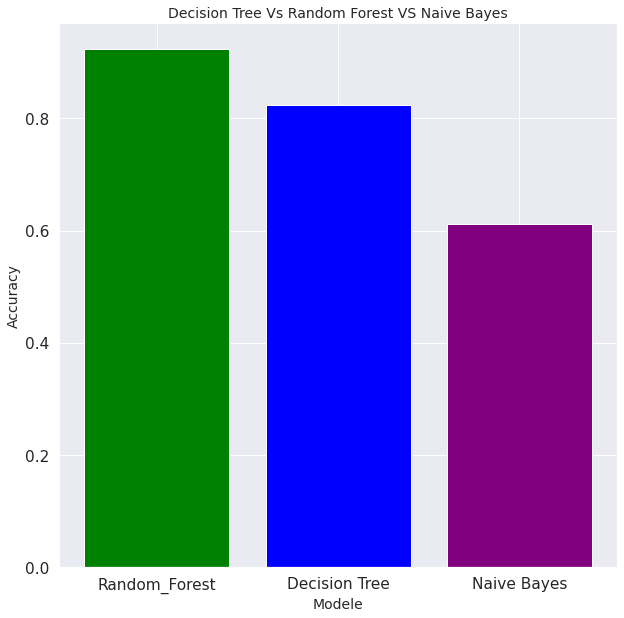

In [ ]:
import matplotlib.pyplot as plt
   
Country = ['Random_Forest','Decision Tree','Naive Bayes']
GDP_Per_Capita = [acc_score,acc_score_dt,acc_score_gnb]
plt.figure(figsize=(10,10))
New_Colors = ['green','blue','purple']
plt.bar(Country, GDP_Per_Capita, color=New_Colors)
plt.title('Decision Tree Vs Random Forest VS Naive Bayes', fontsize=14)
plt.xlabel('Modele', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()